### PROJECT OBJECTIVES
  - Cummulative Revenue from Products Over Time (Running Totals)
 - Customer Expenditure Over Time(Running Totals/Cummulative Expenditure)

## Project plan

- Import Libraries
- Connect to the database
- Visualize Key Metrics

### Libraries

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
#Connect to the database

In [41]:
server = 'DESKTOP-U507UFU\\MSSQLSERVER01'
database = 'PRACTICE'
#Initiate Connection
conn_str = (
    'Driver={SQL Server};'
    f'Database={database};'
    f'Server={server};'
    'Trusted_Connection = yes;'  
)
#Establish Connection
conn = pyodbc.connect(conn_str)



In [ ]:
query = """
SELECT 
		DATEFROMPARTS(YEAR(transaction_date), MONTH(transaction_date), 1) As date,
		FORMAT(transaction_date, 'MMM') AS Month, 
		category,
		SUM(spend) As Monthly_spend
FROM product_spend
WHERE category = 'appliance'
AND  YEAR(transaction_date) = 2021
GROUP BY 
		DATEFROMPARTS(YEAR(transaction_date), MONTH(transaction_date),1),
		FORMAT(transaction_date, 'MMM'),
		category
ORDER BY date;

"""
df = pd.read_sql(query, conn)

In [ ]:
conn.close()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9 non-null      object 
 1   Month          9 non-null      object 
 2   category       9 non-null      object 
 3   Monthly_spend  9 non-null      float64
dtypes: float64(1), object(3)
memory usage: 420.0+ bytes


In [7]:
df.head(20)

,date,Month,category,Monthly_spend
0,2021-01-01,Jan,appliance,1666.17
1,2021-03-01,Mar,appliance,995.70
2,2021-04-01,Apr,appliance,1636.02
3,2021-05-01,May,appliance,354.12
4,2021-06-01,Jun,appliance,2413.22
5,2021-08-01,Aug,appliance,1315.42
6,2021-10-01,Oct,appliance,122.51
7,2021-11-01,Nov,appliance,2001.34
8,2021-12-01,Dec,appliance,1137.53


In [6]:
df.to_csv("appliance_perfomance_2021.csv", index = False)

In [8]:
import os 
print(os.getcwd())

D:\SQL  PRACTICE\Window Function Revision


In [14]:
#Clean Column Names 
df.columns = df.columns.str.strip()


### Visualize

Text(0, 0.5, 'Monthly Spend(USD)')

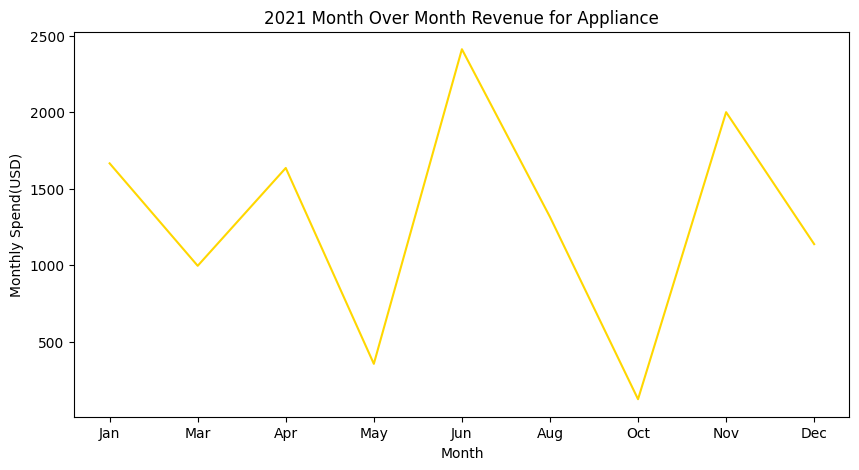

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data = df,
    x = 'Month' ,
    y =  'Monthly_spend',
    color = 'gold'
)
plt.title("2021 Month Over Month Revenue for Appliance")
plt.xlabel("Month")
plt.ylabel("Monthly Spend(USD)")

### Comments
- Monthly spend that year(2021) on Appliance was choppy

### Year Over Year Analysis per Category

In [11]:
query = """


SELECT YEAR(transaction_date) AS year,
category,
SUM(spend) AS sales
FROM product_spend
WHERE category = 'appliance'
GROUP BY YEAR(transaction_date), category
;


"""
df1 = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_9036\665063334.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, conn)


#### 1. APPLIANCE (YOY) GROWTH

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4 non-null      object 
 1   category  4 non-null      object 
 2   sales     4 non-null      float64
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [53]:
#Change Data Type to Numeric(Sales) and Year String
df1['year'] = df1['year'].astype(str)
df1['sales'] = pd.to_numeric(df1['sales'], errors = 'coerce')

In [19]:
df1.head(20)

,year,category,sales
0,2021,appliance,11642.03
1,2022,appliance,5671.54
2,2023,appliance,6031.99
3,2024,appliance,10466.99


Text(0, 0.5, 'Sales(USD)')

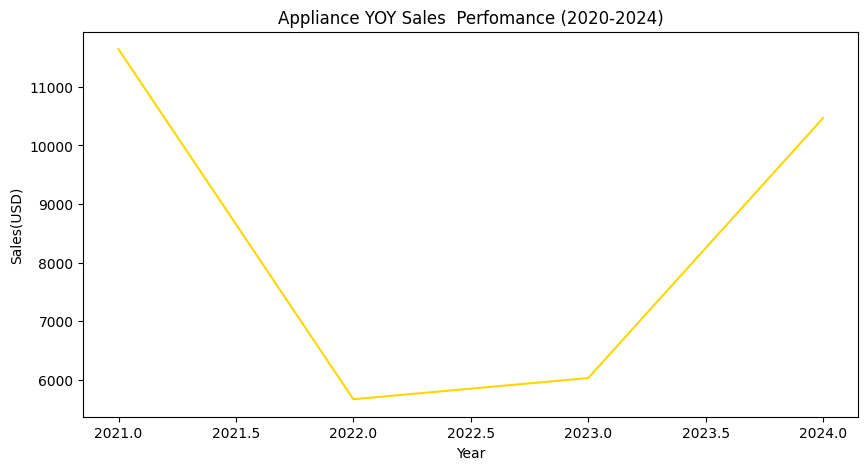

In [12]:
plt.figure(figsize = (10,5))
sns.lineplot(
    data = df1,
    color = 'gold',
    x = 'year',
    y = 'sales'  
)
plt.title("Appliance YOY Sales  Perfomance (2020-2024)")
plt.xlabel('Year')
plt.ylabel('Sales(USD)')

#### Comments
- Appliance Spend signifcantly dropped between 2021 and 2022 and later recovered(Demand grew) between 2023 and 2024

## 2. Electronics(YOY Growth)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4 non-null      object 
 1   category  4 non-null      object 
 2   sales     4 non-null      float64
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [32]:
#Change Year column to string
df2['year'] = df2['year'].astype(str)

In [25]:
df2.head()

,year,category,sales
0,2021,electronics,14022.95
1,2022,electronics,11250.88
2,2023,electronics,12802.34
3,2024,electronics,4843.26


In [26]:
df2.to_csv("electronics_yoy_growth.csv", index = "False") 

In [28]:
import os
print(os.getcwd())

D:\SQL  PRACTICE\Window Function Revision


In [29]:
#Clean Columns 
df2.columns = df2.columns.str.strip()

Text(0, 0.5, 'Sales(USD)')

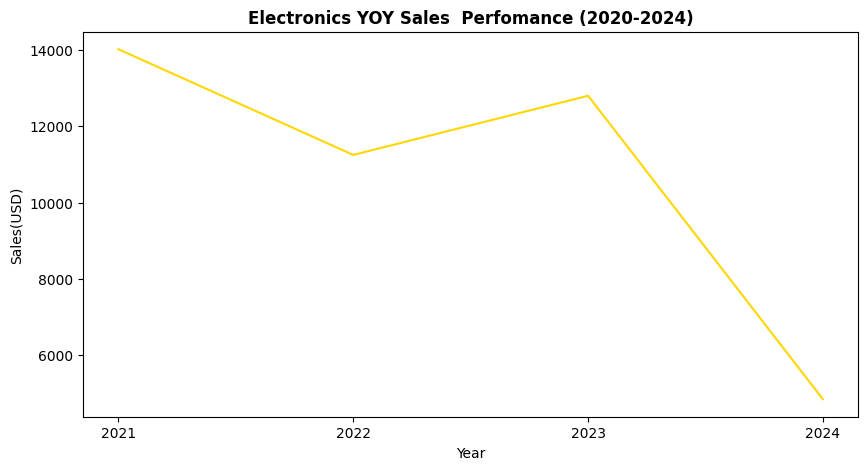

In [51]:
#Visualize
plt.figure(figsize = (10,5))
sns.lineplot(
    data = df2,
    x = 'year',
    y = 'sales',
    color = 'gold'
)
plt.title("Electronics YOY Sales  Perfomance (2020-2024)", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Sales(USD)")

### Comment
- Massive Downtrend in sales of Electronics from 2021 to 2024
- Demand of Electronics Declined over time from 2021 to 2024

### Recommendation
- Stock Less of Electronics
- Advertise more
- Invest more in items that have higher consumer demand

## 3. Appliance(YOY Growth)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4 non-null      int64  
 1   category  4 non-null      object 
 2   sales     4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


In [47]:
#Change datatype to string for Year
df3['year'] = df3['year'].astype(str)

In [38]:
df3.head()

,year,category,sales
0,2021,furniture,11979.74
1,2022,furniture,9989.38
2,2023,furniture,10449.28
3,2024,furniture,8847.02


In [45]:
df3.to_csv("Furniture_yoy_growth.csv", index ='False')

Text(0, 0.5, 'Sales(USD)')

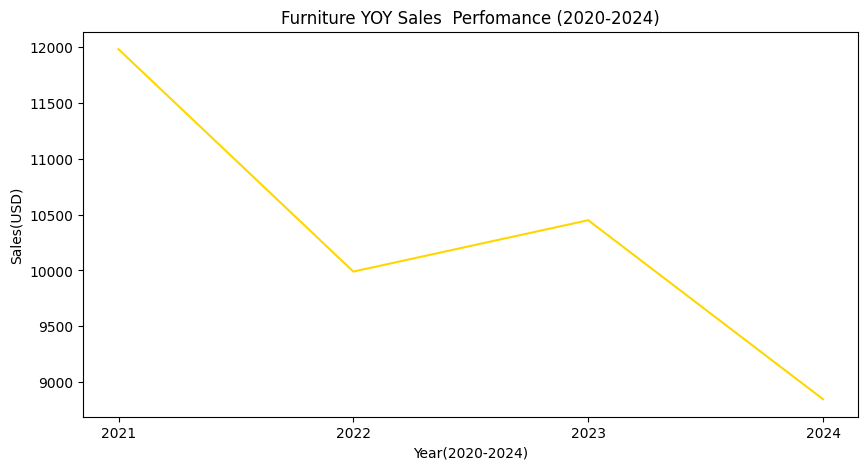

In [55]:
#Visualize(YoY Growth of Furniture Sales)
plt.figure(figsize = (10,5))
sns.lineplot(
    data = df3,
    x= 'year',
    y = 'sales',
    color = 'gold'
)
plt.title("Furniture YOY Sales  Perfomance (2020-2024)")
plt.xlabel("Year(2020-2024)")
plt.ylabel("Sales(USD)")


### Comments
- Downtrend in sales of Furniture
- Possible decline in Demand

### Recommendations
- Stock Less
- Advertise More

## Top 10 products By Total Revenue

In [42]:
query = """

  SELECT  TOP 10 product, category,  SUM(spend) AS total_spend  FROM product_spend
  GROUP BY product, category
  ORDER BY total_spend DESC;

"""
df4 = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_16472\2259273733.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query, conn)


In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      10 non-null     object 
 1   category     10 non-null     object 
 2   total_spend  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [19]:
df4.head(10)

,product,category,total_spend
0,office chair,furniture,12250.25
1,refrigerator,appliance,11092.95
2,television,electronics,10362.22
3,smartphone,electronics,8959.97
4,desk,furniture,8780.73
5,tablet,electronics,7659.18
6,vacuum,electronics,7509.56
7,sofa,furniture,7114.33
8,coffee table,furniture,6963.44
9,microwave,appliance,6578.44


In [21]:
df4.to_csv("Top10_best_selling_products.csv", index = "False")

Text(0.5, 0, 'Revenue(USD)')

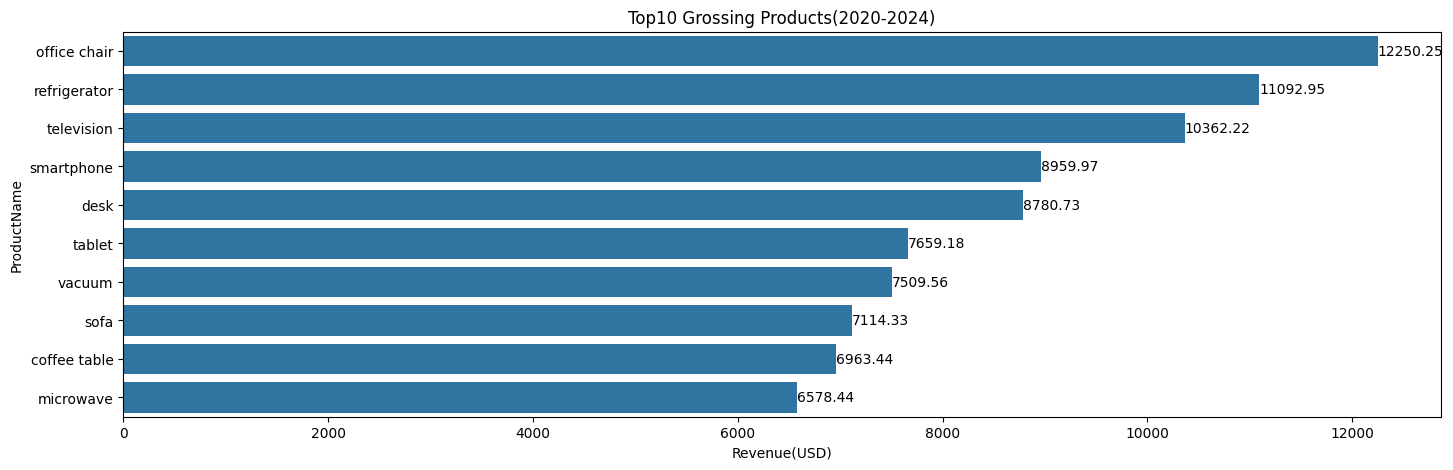

In [43]:
#Visuualize 
plt.figure(figsize=(17,5))
sns.barplot(
    data = df4,
    x = 'total_spend',
    y = 'product'    
)
for index, value in enumerate(df4['total_spend']):
    plt.text(value, index, str(value), ha = 'left',
             va = 'center')
plt.title("Top10 Grossing Products(2020-2024)")
plt.ylabel("ProductName")
plt.xlabel("Revenue(USD)")

### YOY Revenue for Top 5 Products

In [84]:
query = """
SELECT YEAR(transaction_date) AS year,
product,
SUM(spend) AS sales
FROM product_spend
WHERE product = 'desk'
GROUP BY YEAR(transaction_date), product
;
"""
df9 = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_9036\1313964729.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df9 = pd.read_sql(query, conn)


### I) Office Chairs

In [35]:
df5.head()

,year,product,sales
0,2021,office chair,3486.31
1,2022,office chair,2002.11
2,2023,office chair,3972.67
3,2024,office chair,2789.16


In [33]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     4 non-null      int64  
 1   product  4 non-null      object 
 2   sales    4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


In [37]:
#Change Data type for Year(String)
df5['year'] = df5['year'].astype(str)

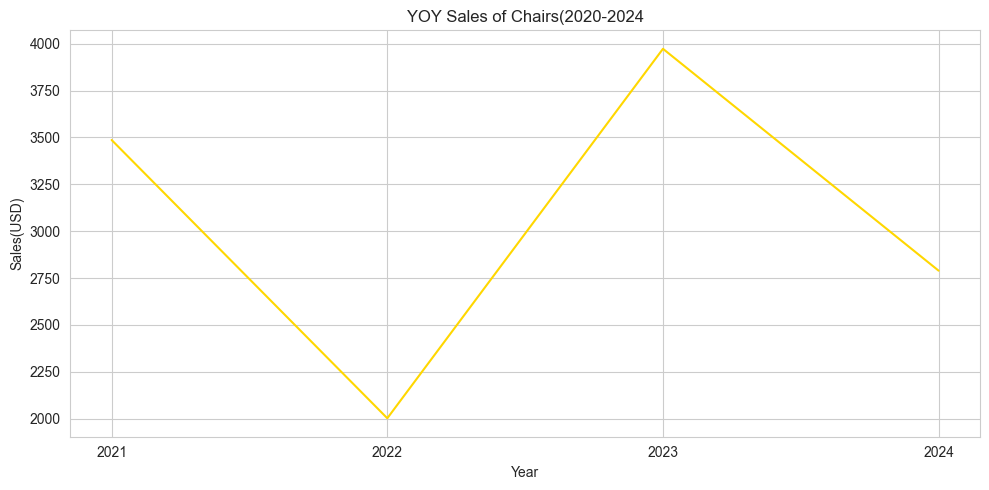

In [53]:
#Visualize 
plt.figure(figsize= (10,5))
# sns.set_style('whitegrid')
sns.lineplot(
    data = df5,
    y= 'sales',
    x = 'year',
    color = 'gold'
)
plt.title("YOY Sales of Chairs(2020-2024")
plt.xlabel("Year")
plt.ylabel("Sales(USD)")
plt.tight_layout()
plt.savefig("YOY Perfomance for Office Chairs.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## Comments 
- Steady Sales between 2022 and 2024

### ii) Refrigerators

In [58]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     4 non-null      int64  
 1   product  4 non-null      object 
 2   sales    4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


In [59]:
#change datatype
df6['year'] = df6['year'].astype(str)

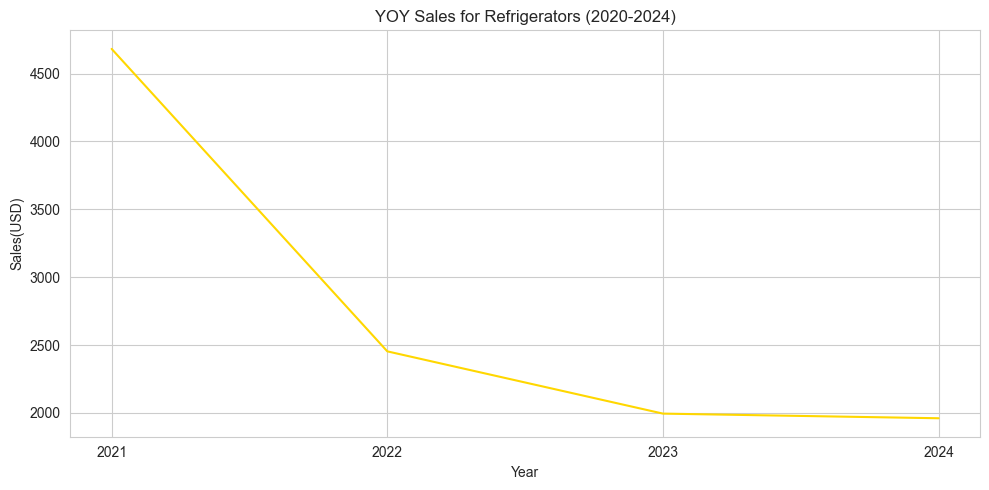

In [65]:
#Visualize 
plt.figure(figsize = (10,5))
sns.lineplot(
    data = df6,
    x = 'year',
    y = 'sales',
    color = 'gold'
)
plt.title("YOY Sales for Refrigerators (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Sales(USD)")
plt.tight_layout()
# plt.savefig("YOY Sales for Refrigerators.png", dpi = 300, bbox_inches = 'tight')
plt.show()

### iii) Television

In [67]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     3 non-null      int64  
 1   product  3 non-null      object 
 2   sales    3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


In [70]:
df7.head()

,year,product,sales
0,2021,television,2189.18
1,2022,television,5221.48
2,2023,television,2951.56


In [68]:
#change datatype
df7['year'] = df7['year'].astype(str)

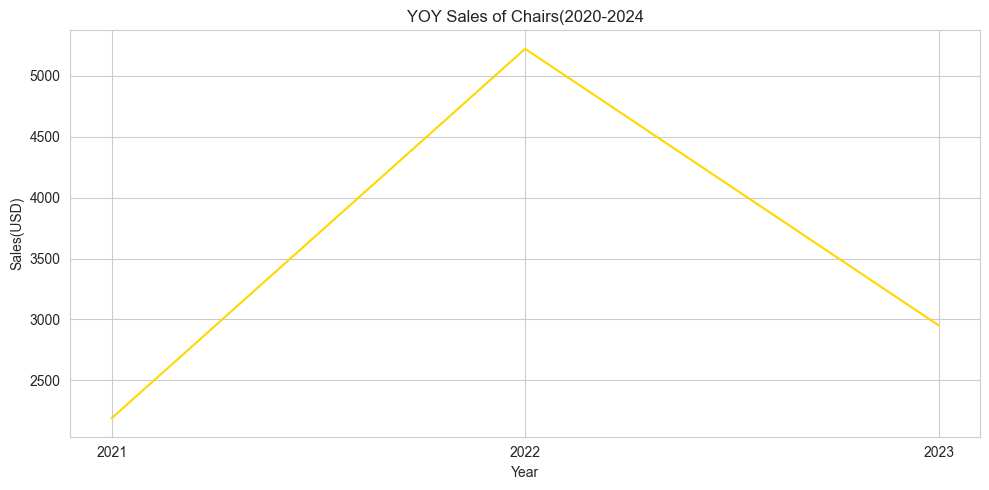

In [73]:
#Visualize 
plt.figure(figsize= (10,5))
# sns.set_style('whitegrid')
sns.lineplot(
    data = df7,
    y= 'sales',
    x = 'year',
    color = 'gold'
)
plt.title("YOY Sales of Chairs(2020-2024")
plt.xlabel("Year")
plt.ylabel("Sales(USD)")
plt.tight_layout()
plt.savefig("YOY Sales for TVs.png", dpi = 300, bbox_inches = 'tight')
plt.show()

#### Comment
- TVs were not bought in 2024

### iv) Smart Phones

In [80]:
df8.head()

,year,product,sales
0,2021,smartphone,3202.10
1,2022,smartphone,270.36
2,2023,smartphone,3732.44
3,2024,smartphone,1755.07


In [78]:
#change datatype
df8['year'] = df6['year'].astype(str)

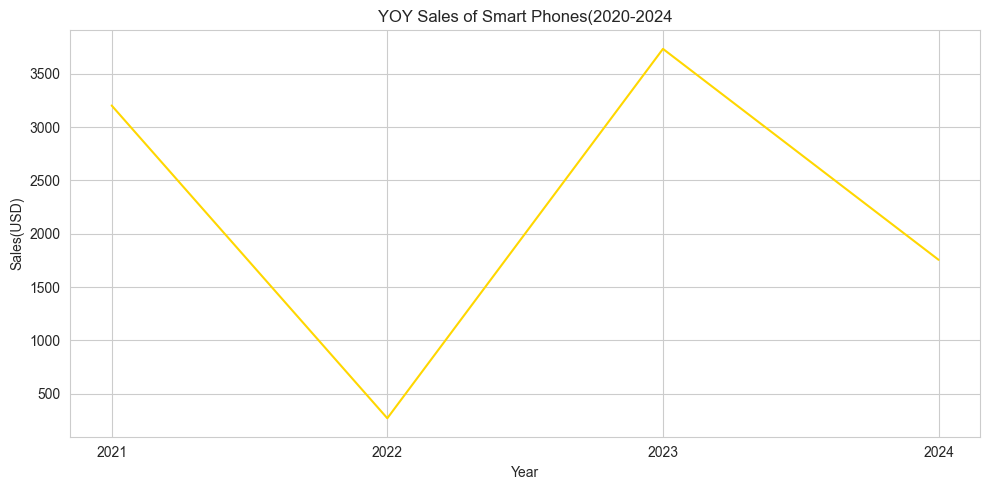

In [83]:
#Visualize 
plt.figure(figsize= (10,5))
# sns.set_style('whitegrid')
sns.lineplot(
    data = df8,
    y= 'sales',
    x = 'year',
    color = 'gold'
)
plt.title("YOY Sales of Smart Phones(2020-2024")
plt.xlabel("Year")
plt.ylabel("Sales(USD)")
plt.tight_layout()
plt.savefig("SmartPhones.png", dpi = 300, bbox_inches = 'tight')
plt.show()

### Comments 
- Steady Price Increase between 2022 and 2024

### v) Desk

In [85]:
#change datatype
df9['year'] = df9['year'].astype(str)

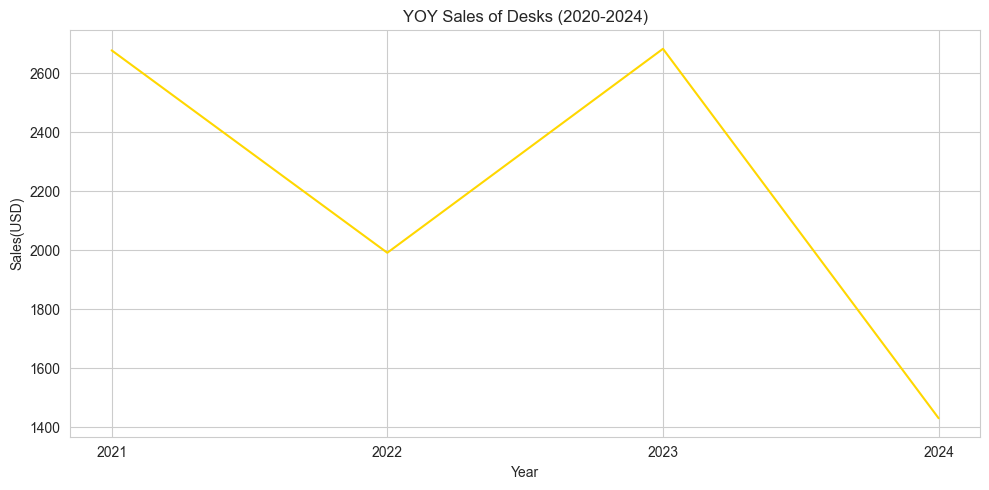

In [89]:
#Visualize 
plt.figure(figsize= (10,5))
# sns.set_style('whitegrid')
sns.lineplot(
    data = df9,
    y= 'sales',
    x = 'year',
    color = 'gold'
)
plt.title("YOY Sales of Desks (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Sales(USD)")
plt.tight_layout()
plt.savefig("Desks.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## Scatter Plot 

In [31]:
query = """
       SELECT product, transaction_date, COUNT(*) AS Frequency, SUM(spend) AS Total_expenditure 
   FROM product_spend
   GROUP BY product, transaction_date;
"""
df10 = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_16472\1383063033.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df10 = pd.read_sql(query, conn)


In [32]:
df10.head()

,product,transaction_date,Frequency,Total_expenditure
0,refrigerator,2021-01-05 02:54:00,1,895.28
1,smartphone,2021-01-06 04:33:00,1,1132.74
2,coffee table,2021-01-13 22:17:00,1,542.53
3,refrigerator,2021-01-19 12:12:00,1,400.33
4,desk,2021-01-22 15:09:00,1,36.57


In [9]:
df10.to_csv("Scatter Data.csv", index = False)

### Scatter Plot

### Objective
- To track Fast and Slow moving products

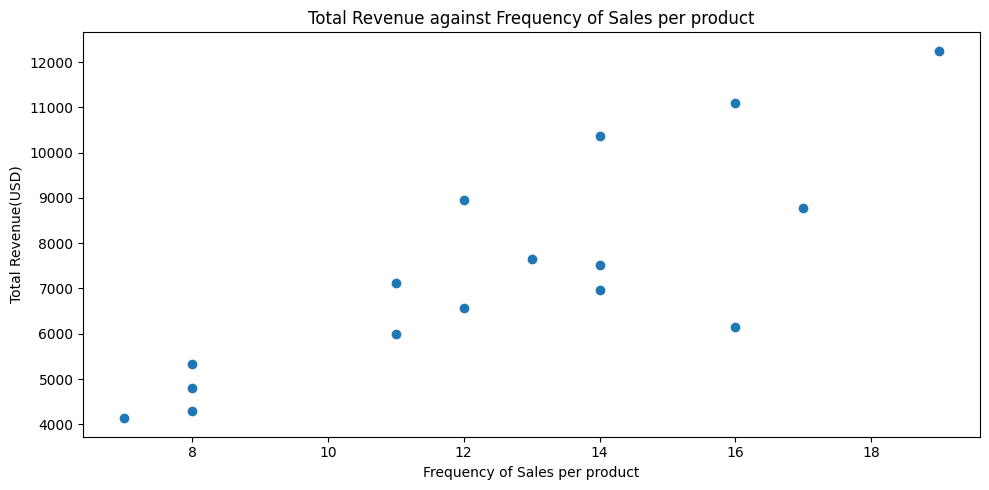

In [25]:
plt.figure(figsize= (10,5))
plt.scatter(
    data = df10,
    x= 'Frequency',
    y = 'Total_expenditure'
    
)
plt.title("Total Revenue against Frequency of Sales per product")
plt.xlabel("Frequency of Sales per product")
plt.ylabel("Total Revenue(USD)")
plt.tight_layout()
plt.show()


### Comment 
- There is a direct proportion between Frequency of Sales and Total Revenue. (More orders, More Revenue)
- Better option is PowerBi for visulaization of Scatter mapplot

In [47]:
query = """

SELECT category, product, user_id, spend, transaction_date, YEAR(transaction_date) AS Year, FORMAT(transaction_date, 'MMMM') AS Month 
FROM product_spend;

"""
df11 = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_16472\679244219.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df11 = pd.read_sql(query, conn)


In [48]:
df11.to_csv('product_spend.csv', index = False)